Unveiling Patterns in Seismicity: Comprehensive Analysis of the 2011 Goma Volcano Observatory Seismicity Catalog

Albert Kyambikwa

Project Overview

This project investigates geospatial and geophysical changes associated with seismic events in the Virunga Volcanic Province (VVP). The primary focus is to analyze how these events were distributed geographically (latitude, longitude, depth) and temporally, particularly leading up to volcanic eruptions. Advanced data science methods are applied to detect shifts or clusters in seismic behavior, ultimately enhancing volcanic risk monitoring and forecasting for the active volcanoes in the region.

Project Goals

The main goal is to explore geospatial and geophysical changes in the catalog of earthquakes recorded by the Goma Volcano Observatory (GVO) in 2011. Specific objectives include:

Analyzing spatial patterns of seismicity.

Identifying temporal trends and anomalies.

Examining relationships between seismic activity and geophysical parameters.

Improving understanding of volcanic and tectonic dynamics.

Project Dataset

The dataset, collected by GVO, contains seismic events from 2011 and consists of:

Sheet 1: Frequency Data
Columns: Date, LF (Low Frequency), HF (High Frequency), Cumulative Events (CUMUL).
Purpose: Tracks event frequency over time to identify patterns, spikes, or precursors to volcanic events.

Sheet 2: Spatial Data
Columns: Date+Time, Longitude (Lon), Latitude (Lat), Depth, Time Since Last Event (seconds), Event Type (ID).
Purpose: Provides spatial insights into event locations and depths, highlighting areas of concern before volcanic crises.

Data Preparation: Extract, Transform, Load (ETL)

The dataset is in Excel format and located on Google Drive. The workflow for ETL is as follows:

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')
# File paths
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_counting.xlsx'
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_waypoints.xlsx'
# Load datasets
counting_df = pd.read_excel(file_path_1)
waypoints_df = pd.read_excel(file_path_2)

Mounted at /content/drive


Exploratory Data Analysis (EDA)

Data Inspection

Step 1: Check Data Types

In [ ]:
print("Data types for 'counting_df':")
print(counting_df.dtypes)

Data types for 'counting_df':
Date               datetime64[ns]
Shallow LP                float64
Deep LP                   float64
Total LP                  float64
HF                        float64
Depth                     float64
Beta Shallow LP           float64
Beta Deep LP              float64
Beta Total LP             float64
date               datetime64[ns]
Rsam                      float64
Rsam_cum                  float64
dtype: object


Frequency Analysis

Compute mean, median, and standard deviation for Shallow LP, Deep LP, and Total LP:

In [ ]:
columns_to_analyze = ['Shallow LP', 'Deep LP', 'Total LP']

for column in columns_to_analyze:
    median = counting_df[column].median()
    std_dev = counting_df[column].std()
    mean = counting_df[column].mean()

    print(f"Statistics for {column}:")
    print(f"  Median: {median}")
    print(f"  Standard Deviation: {std_dev}")
    print(f"  Mean: {mean}\n")

Statistics for Shallow LP:
  Median: 9.0
  Standard Deviation: 21.910480819518227
  Mean: 11.11522633744856

Statistics for Deep LP:
  Median: 0.0
  Standard Deviation: 4.556104046921804
  Mean: 1.7119341563786008

Statistics for Total LP:
  Median: 10.0
  Standard Deviation: 25.909655943216347
  Mean: 12.82716049382716



Analysis of Spatial Data

Step 2: Analyze Table 2: GVOCatalog_2011_waypoints.xlsx

A. Check Data Types

In [ ]:
print("Data types for 'waypoints_df':")
print(waypoints_df.dtypes)

Data types for 'waypoints_df':
Date Time                          datetime64[ns]
Lon                                       float64
Lat                                       float64
Depth                                     float64
Time Since Last Event [seconds]           float64
Event Type                                 object
dtype: object


B.Compute Descriptive Statistics for Depth

In [ ]:
mean_depth = waypoints_df['Depth'].mean()
std_dev_depth = waypoints_df['Depth'].std()
median_depth = waypoints_df['Depth'].median()

print(f"Mean Depth: {mean_depth}")
print(f"Standard Deviation of Depth: {std_dev_depth}")
print(f"Median Depth: {median_depth}")

Mean Depth: 4.514369645042839
Standard Deviation of Depth: 6.1077238193075365
Median Depth: 4.0


C.Plot Depth Over Time
By analyzing depth data over time,one can:
Identify potential hazards or unusual behavior.
Understand dynamic processes within the Earth, such as tectonic movements and magma migration.

            Date Time     Lon    Lat  Depth  Time Since Last Event [seconds]  \
0 2011-01-01 06:11:04  29.207 -1.333    2.9                          33234.0   
1 2011-01-01 15:24:58  29.265 -1.466    2.0                          33234.0   
2 2011-01-01 15:47:36  29.208 -1.365    4.0                           1358.0   
3 2011-01-01 16:21:04  29.227 -1.389    4.2                           2008.0   
4 2011-01-01 16:21:08  29.216 -1.398    4.4                              4.0   

  Event Type  
0         LP  
1         LP  
2         LP  
3         LP  
4         LP  


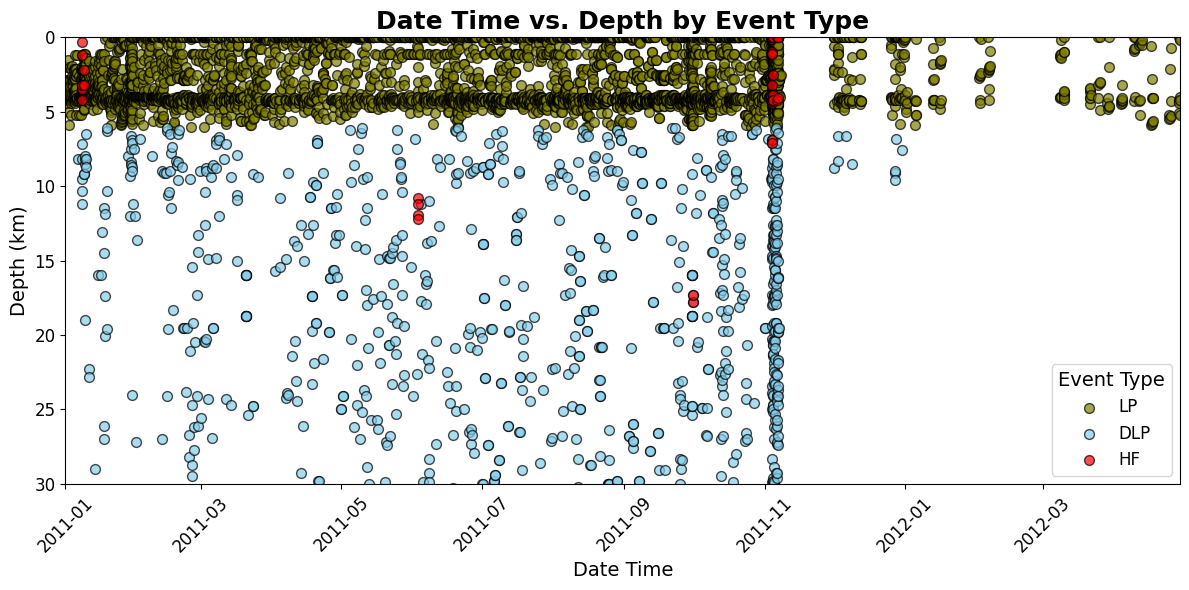

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_waypoints.xlsx'
waypoints_df = pd.read_excel(file_path_2)

# Ensure 'Date Time' is in datetime format
waypoints_df['Date Time'] = pd.to_datetime(waypoints_df['Date Time'])

# Preview the data
print(waypoints_df.head())

# Define colors for each event type
event_colors = {'LP': 'olive', 'DLP': 'skyblue', 'HF': 'red'}

# Plot Date Time vs. Depth with colors based on Event Type
plt.figure(figsize=(12, 6))
for event_type, color in event_colors.items():
    filtered_df = waypoints_df[waypoints_df['Event Type'] == event_type]
    plt.scatter(
        filtered_df['Date Time'],
        filtered_df['Depth'],
        color=color,
        label=event_type,
        alpha=0.7,
        edgecolor='k',
        s=50
    )

# Customize the plot
plt.title('Date Time vs. Depth by Event Type', fontsize=18, fontweight='bold')
plt.xlabel('Date Time', fontsize=14)
plt.ylabel('Depth (km)', fontsize=14)
plt.gca().invert_yaxis()  # Depth increases downward
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(pd.Timestamp('2011-01-01'), waypoints_df['Date Time'].max())
plt.ylim(30, 0)  # Depth from 0 to 30 km

plt.legend(title='Event Type', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

The map of earthquakes is a vital tool for understanding the distribution of seismic events. It highlights areas on the Volcano with high seismic activity, the frequency and intensity of earthquakes, and patterns that can inform hazard assessments,.The map plot shows the event locations within the specified latitude and longitude range.The depth distribution plot now correctly shows depth starting from 0 km at the top, going down to 30 km at the bottom, for each event type. I install contextily and geopandas for working with satellite imagery, as they can fetch and overlay basemaps.

In [ ]:
!pip install --upgrade contextily xyzservices

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.9 MB/s eta 0:00:00


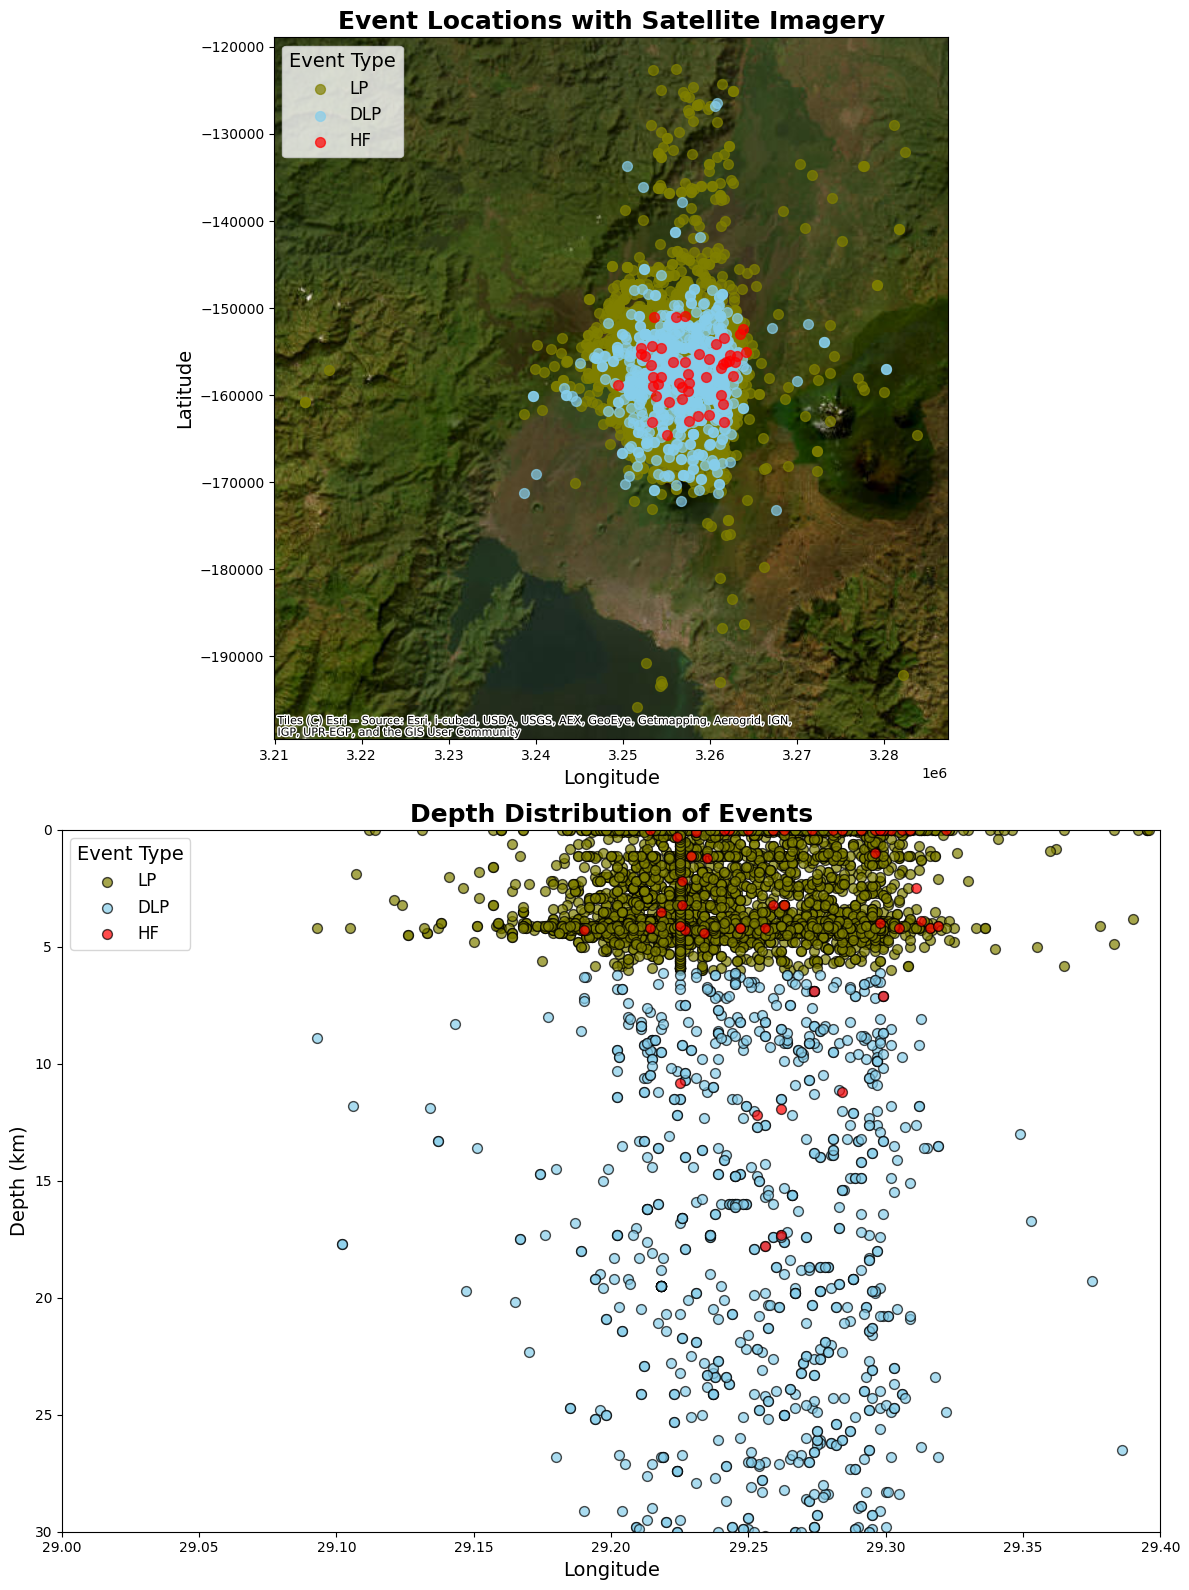

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_waypoints.xlsx'
waypoints_df = pd.read_excel(file_path_2)

# Filter Lat and Lon within specified limits
lat_min, lat_max = -1.8, -1.1
lon_min, lon_max = 28.50, 29.50
waypoints_df_filtered = waypoints_df[(waypoints_df['Lat'] >= lat_min) & (waypoints_df['Lat'] <= lat_max) &
                                     (waypoints_df['Lon'] >= lon_min) & (waypoints_df['Lon'] <= lon_max)]

# Convert the coordinates into a GeoDataFrame for the basemap overlay
geometry = [Point(xy) for xy in zip(waypoints_df_filtered['Lon'], waypoints_df_filtered['Lat'])]
gdf = gpd.GeoDataFrame(waypoints_df_filtered, geometry=geometry, crs="EPSG:4326")

# Convert GeoDataFrame to Web Mercator projection for compatibility with basemap tiles
gdf_web_mercator = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 16))

# **Map 1: Satellite Imagery with Earthquake Locations**
ax[0].set_title('Event Locations with Satellite Imagery', fontsize=18, fontweight='bold')

# Add earthquake points to the map
event_colors = {'LP': 'olive', 'DLP': 'skyblue', 'HF': 'red'}
for event_type, color in event_colors.items():
    filtered_gdf = gdf_web_mercator[gdf_web_mercator['Event Type'] == event_type]
    filtered_gdf.plot(ax=ax[0], color=color, markersize=50, alpha=0.7, label=event_type)

# Add the basemap
ctx.add_basemap(ax[0], crs=gdf_web_mercator.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Customize map plot
ax[0].legend(title='Event Type', fontsize=12, title_fontsize=14, loc='upper left')
ax[0].set_xlabel('Longitude', fontsize=14)
ax[0].set_ylabel('Latitude', fontsize=14)

# **Map 2: Depth Distribution**
ax[1].set_title('Depth Distribution of Events', fontsize=18, fontweight='bold')

# Plot depth distribution for each event type
for event_type, color in event_colors.items():
    filtered_df = waypoints_df_filtered[waypoints_df_filtered['Event Type'] == event_type]
    ax[1].scatter(
        filtered_df['Lon'],
        filtered_df['Depth'],
        color=color,
        label=event_type,
        alpha=0.7,
        edgecolor='k',
        s=50
    )

# Customize depth plot
ax[1].set_xlabel('Longitude', fontsize=14)
ax[1].set_xlim(29.00, 29.40)
ax[1].set_ylabel('Depth (km)', fontsize=14)
#ax[1].invert_yaxis()
ax[1].set_ylim(30, 0)
ax[1].legend(title='Event Type', fontsize=12, title_fontsize=14, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Statistical Methods

Beta Statistics
The Beta statistic measures deviations from background seismicity rates. I used it to find period of seismic quiescence and also to find anomalous increases above background rates following Aron and Hardebeck, 2009; Pesicek et al. 2018. Formula: B = (Na - (N * Ta / Y))/ sqrt((N * Ta/T)(1 - Ta/T))
Where:
N = Total number of events in the catalog over time T.
Na = Number of events in the time window Ta.
T = Observation period (310 days).Ta is 310 days from January 1,2011 to April 5,2012

Ta = Time window of interest.

Thus , absolute values of B >= 1.95 are significant deviations from the assume underlying distribution at the 95% confidence level.

Beta value over time Plot of the beta staisctic after computing and adding Beta Shallow LP, Beta Deep LP and Beta Total LP columns to the catalog file. Plot of Beta Statistic allows to visualize how the distribution of seismic event frequencies evolves over time, and help identify periods of higher variability.

Available columns: Index(['Date', 'Shallow LP', 'Deep LP', 'Total LP', 'HF', 'Depth',
       'Beta Shallow LP', 'Beta Deep LP', 'Beta Total LP', 'date', 'Rsam',
       'Rsam_cum'],
      dtype='object')


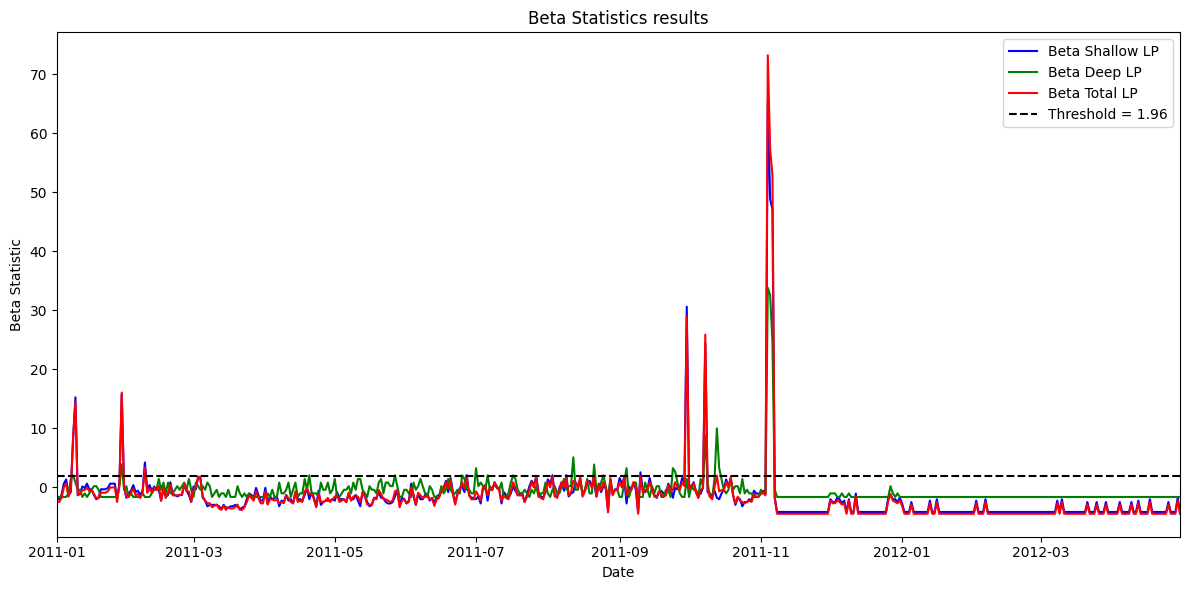

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the provided Excel file
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_counting.xlsx'
data = pd.read_excel(file_path_1)
# Constants
# Total observation period in days
T = 310
# Analysis interval in days
Ta = 1
# Correct column names (replace with exact ones)
N_shallow = data['Shallow LP'].sum()
N_deep = data['Deep LP'].sum()
N_total_lp = data['Total LP'].sum()
# Function to calculate Beta statistic
def beta_stat(Na, N, Ta, T):
    return (Na - (N * Ta / T)) / np.sqrt((N * Ta / T) * (1 - Ta / T))
# Compute Beta statistics for each event type
data['Beta Shallow LP'] = data['Shallow LP'].apply(lambda x: beta_stat(x, N_shallow, Ta, T))
data['Beta Deep LP'] = data['Deep LP'].apply(lambda x: beta_stat(x, N_deep, Ta, T))
data['Beta Total LP'] = data['Total LP'].apply(lambda x: beta_stat(x, N_total_lp, Ta, T))
# Inspect available columns to confirm names
print("Available columns:", data.columns)
data
# Plot the Beta statistics with a threshold line
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Beta Shallow LP'], label='Beta Shallow LP', color='blue')
plt.plot(data['Date'], data['Beta Deep LP'], label='Beta Deep LP', color='green')
plt.plot(data['Date'], data['Beta Total LP'], label='Beta Total LP', color='red')
# Add threshold line
threshold = 1.96
plt.axhline(y=threshold, color='black', linestyle='--', label=f'Threshold = {threshold}')
# Set x-axis limits to start from the first day of 2011
plt.xlim(pd.Timestamp('2011-01-01'), data['Date'].max())
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Beta Statistic')
plt.title('Beta Statistics results')
plt.legend()
plt.tight_layout()
# Display the plot
plt.show()

Real Seismic amplitude Measurement(RSAM) vs Time

By computing Real Seismic Amplitude Measurement(RSAM), I visualize and track the intensity of seismic activity over time to interpret potential volcanic or the likelihood of the  eruption in 2011.RSAM track the energy release by volcanic earthquake and shows the eminance of catastrophic event.

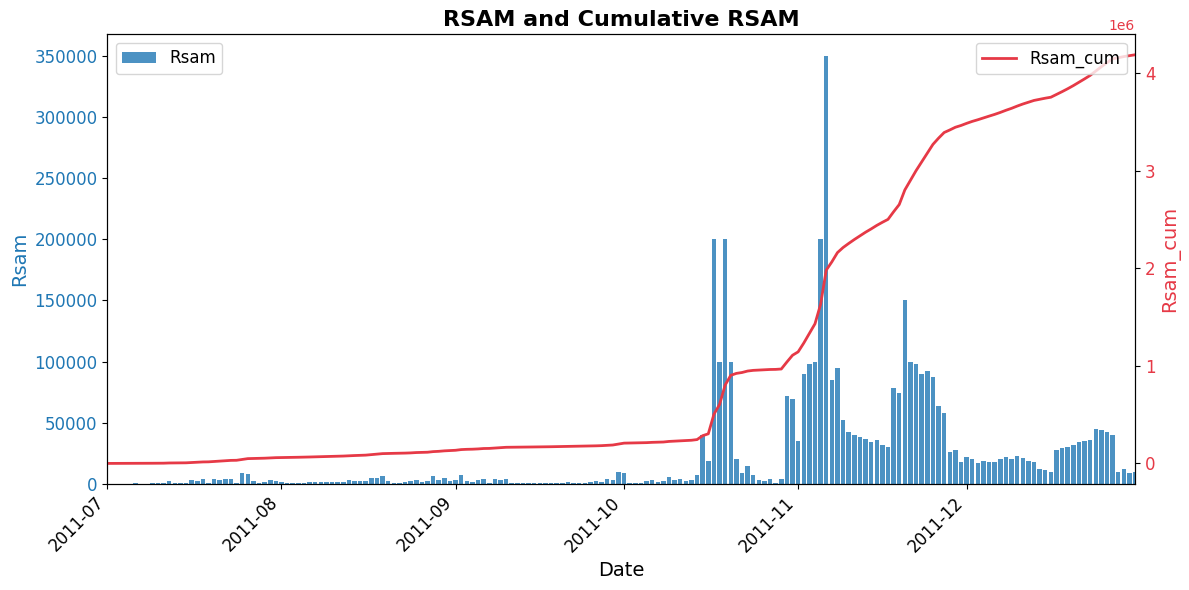

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_counting.xlsx'
data = pd.read_excel(file_path_1)
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])
# Create a figure with custom size and resolution
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=100)
# Plot the Rsam data as a bar plot
ax1.bar(data['date'], data['Rsam'], color='#1f77b4', alpha=0.8, label='Rsam', width=0.8)
# Customizing the primary y-axis (Rsam)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Rsam', color='#1f77b4', fontsize=14)
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_title('RSAM and Cumulative RSAM', fontsize=16, fontweight='bold')
# Set the x-axis limit to start at 2011-07-01
ax1.set_xlim(pd.to_datetime('2011-07-01'), data['date'].max())
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Create a secondary y-axis to plot Rsam_cum
ax2 = ax1.twinx()
ax2.plot(data['date'], data['Rsam_cum'], color='#e63946', linewidth=2, label='Rsam_cum')
# Customizing the secondary y-axis (Rsam_cum)
ax2.set_ylabel('Rsam_cum', color='#e63946', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#e63946', labelsize=12)
# Adjust layout to ensure everything fits without overlap
fig.tight_layout()
# Add a legend for both axes
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
# Show the plot
plt.show()

Visualizations

Event Distribution by Type
This histogram provides a clear visualization of the distribution of each event type

Index(['Shallow LP', 'Deep LP', 'Total LP', 'HF', 'Depth', 'Beta Shallow LP',
       'Beta Deep LP', 'Beta Total LP', 'date', 'Rsam', 'Rsam_cum'],
      dtype='object')


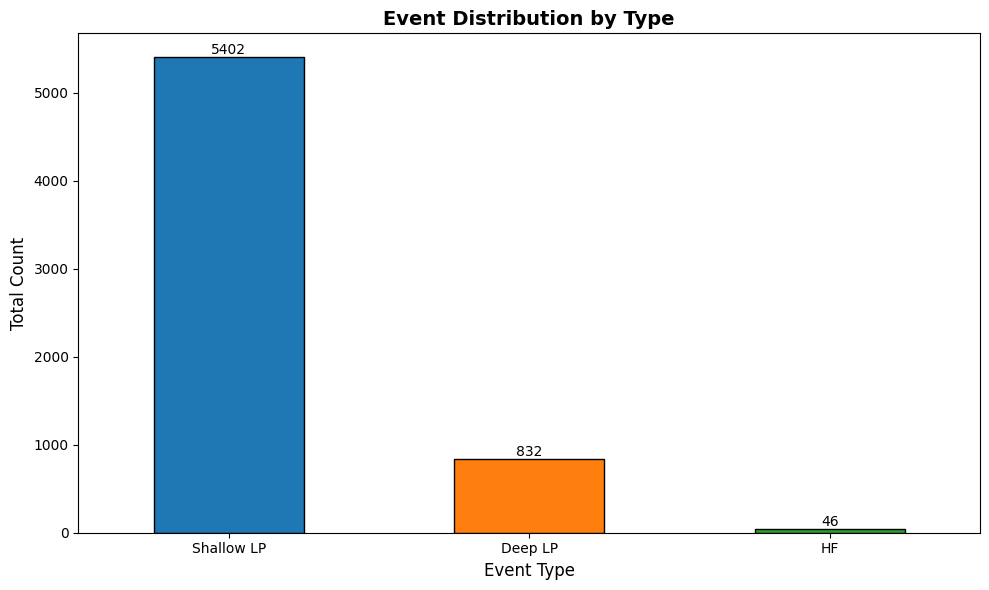

In [ ]:
import matplotlib.pyplot as plt

# Display column names to ensure consistency
print(counting_df.columns)
# Use correct column names
event_types = ['Shallow LP', 'Deep LP', 'HF']
# Strip leading/trailing spaces from column names
counting_df.columns = counting_df.columns.str.strip()
# Plot the total count for each event type with custom colors
ax = counting_df[event_types].sum().plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
    figsize=(10, 6),
    edgecolor='black'
)
# Customize the labels and title
ax.set_xlabel('Event Type', fontsize=12)
ax.set_ylabel('Total Count', fontsize=12)
ax.set_xticks(range(len(event_types)))
ax.set_xticklabels(event_types, rotation=0, fontsize=10)
ax.set_title('Event Distribution by Type', fontsize=14, fontweight='bold')
# Add value labels on top of the bars
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


Temporal Frequency Analysis

To analyze the temporal frequency of seismic events (Shallow LP, Deep LP, and HF) over time,I visualize their monthly or daily trends. Temporal frequency analysis investigates how event frequencies change over time in 2011, allowing insights into patterns, trends, and potential triggers related to volcanic or tectonic activity.

<ipython-input-15-962e6e8ccbe1>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_shallow_lp = counting_df['Shallow LP'].resample('M').sum()
<ipython-input-15-962e6e8ccbe1>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_deep_lp = counting_df['Deep LP'].resample('M').sum()
<ipython-input-15-962e6e8ccbe1>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total_lp = counting_df['Total LP'].resample('M').sum()


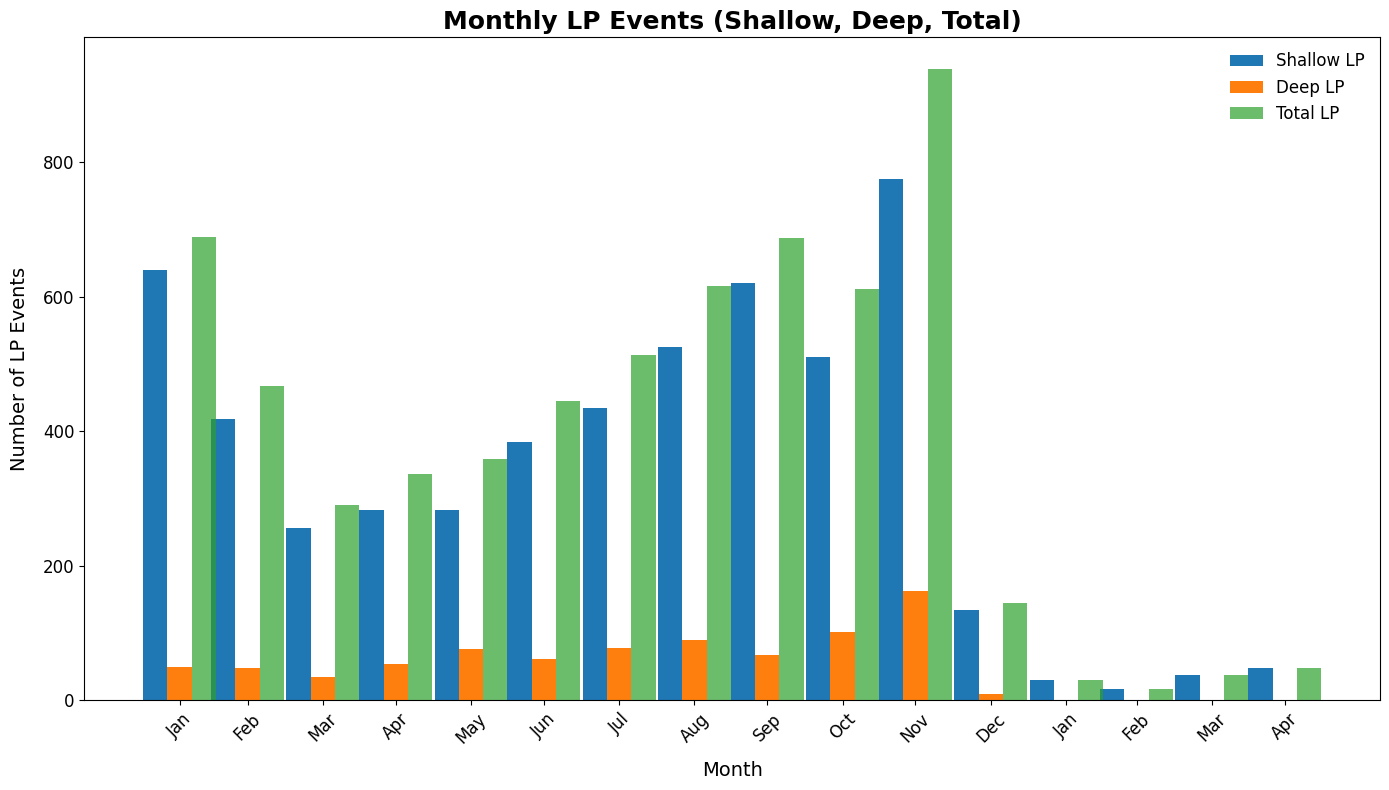

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Load the provided Excel file
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_counting.xlsx'
counting_df = pd.read_excel(file_path_1)
# Strip leading/trailing spaces in column names for consistency
counting_df.columns = counting_df.columns.str.strip()
# Ensure the 'Date' column exists and convert to datetime
if 'Date' not in counting_df.columns:
    raise ValueError("Required column 'Date' is missing from the dataset.")
counting_df['Date'] = pd.to_datetime(counting_df['Date'], errors='coerce')
# Check for and handle NaT values
if counting_df['Date'].isna().sum() > 0:
    print(f"Warning: {counting_df['Date'].isna().sum()} rows with invalid 'Date' entries. Dropping these rows.")
    counting_df.dropna(subset=['Date'], inplace=True)
# Set 'Date' as the index
counting_df.set_index('Date', inplace=True)
# Ensure columns for plotting exist
required_cols = ['Shallow LP', 'Deep LP', 'Total LP']
missing_cols = [col for col in required_cols if col not in counting_df.columns]
if missing_cols:
    raise ValueError(f"Required columns {missing_cols} are missing from the dataset.")
# Resample by month and sum
monthly_shallow_lp = counting_df['Shallow LP'].resample('M').sum()
monthly_deep_lp = counting_df['Deep LP'].resample('M').sum()
monthly_total_lp = counting_df['Total LP'].resample('M').sum()
# Use the exact indices of the resampled data
x = monthly_shallow_lp.index
# Create bar positions
x_shallow = x - pd.DateOffset(days=10)  # Offset for Shallow LP
x_deep = x  # Deep LP on original position
x_total = x + pd.DateOffset(days=10)  # Offset for Total LP
plt.figure(figsize=(14, 8))
# Plot the bars
plt.bar(x_shallow, monthly_shallow_lp, width=10, color='tab:blue', label='Shallow LP', align='center')
plt.bar(x_deep, monthly_deep_lp, width=10, color='tab:orange', label='Deep LP', align='center')
plt.bar(x_total, monthly_total_lp, width=10, color='tab:green', alpha=0.7, label='Total LP', align='center')
# Customize plot for a professional look
plt.title('Monthly LP Events (Shallow, Deep, Total)', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Number of LP Events', fontsize=14, labelpad=10)
plt.xticks(ticks=x, labels=[d.strftime('%b') for d in x], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=False)
# Remove gridlines
plt.grid(False)
# Use tight layout to prevent clipping
plt.tight_layout()
plt.show()

Correlation Heatmap

For a visual representation of how event types influence each other,I do correlation heatmap, whic is an excellent tool for understanding the relationships between multiple seismic event types. It can guide further analysis or modeling efforts.

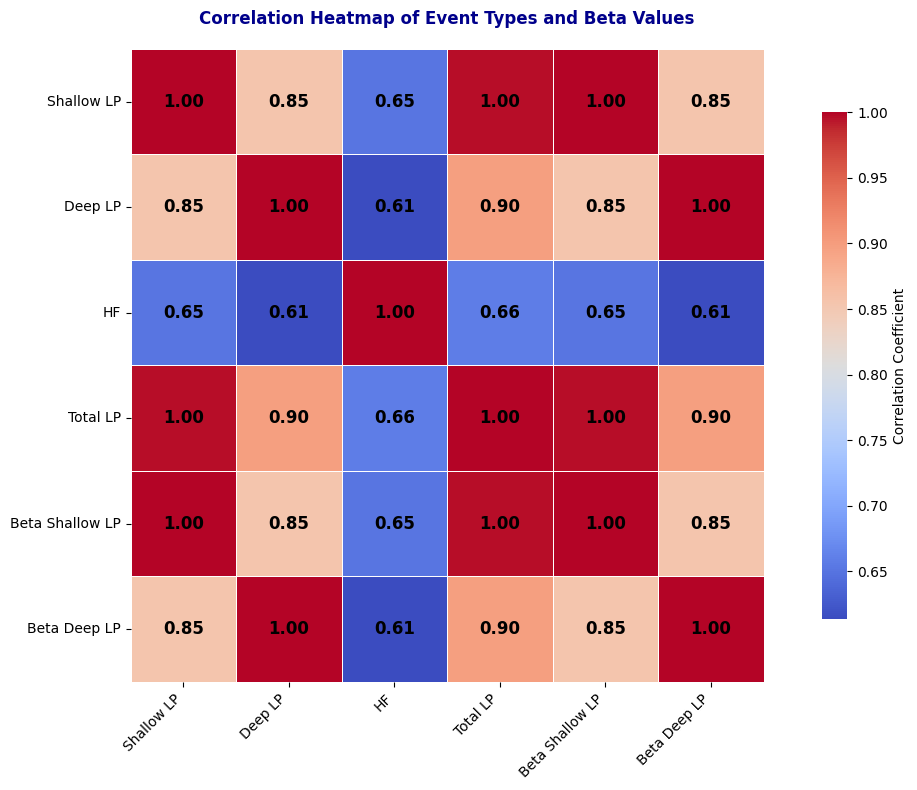

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the event types (ensure these column names match exactly with your dataset)
event_types = ['Shallow LP', 'Deep LP', 'HF', 'Total LP']
# Strip spaces from column names for consistency
counting_df.columns = counting_df.columns.str.strip()
# Create the correlation matrix
correlation_matrix = counting_df[event_types + ['Beta Shallow LP', 'Beta Deep LP']].corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
# Create the heatmap with enhanced visual settings
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.7,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    square=True,
    mask=correlation_matrix.isna(),
)
# Title and Labels
plt.title(
    'Correlation Heatmap of Event Types and Beta Values',
    fontsize=12,
    fontweight='bold',
    color='darkblue',
    pad=18

)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
# Additional styling
plt.tight_layout()
# Show the plot
plt.show()

Confusion Matrix

I perform the confusion matrix to get a detailed view of the performance of a classification model and allows to understand where it is making correct or incorrect predictions

        Date  Shallow LP  Deep LP  Total LP   HF  Depth  Beta Shallow LP  \
0 2011-01-01         9.0      0.0       9.0  0.0    2.9        -2.021700   
1 2011-01-02         9.0      0.0       9.0  0.0    2.0        -2.021700   
2 2011-01-03        12.0      0.0      12.0  0.0    4.0        -1.301876   
3 2011-01-04        20.0      0.0      20.0  0.0    4.2         0.617656   
4 2011-01-05        23.0      0.0      23.0  0.0    4.4         1.337480   

   Beta Deep LP  Beta Total LP       date   Rsam  Rsam_cum  
0     -1.640901      -2.481421 2011-07-01   50.0      50.0  
1     -1.640901      -2.481421 2011-07-02  100.0     150.0  
2     -1.640901      -1.811351 2011-07-03  100.0     250.0  
3     -1.640901      -0.024497 2011-07-04  100.0     350.0  
4     -1.640901       0.645573 2011-07-05  200.0     550.0  
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00 

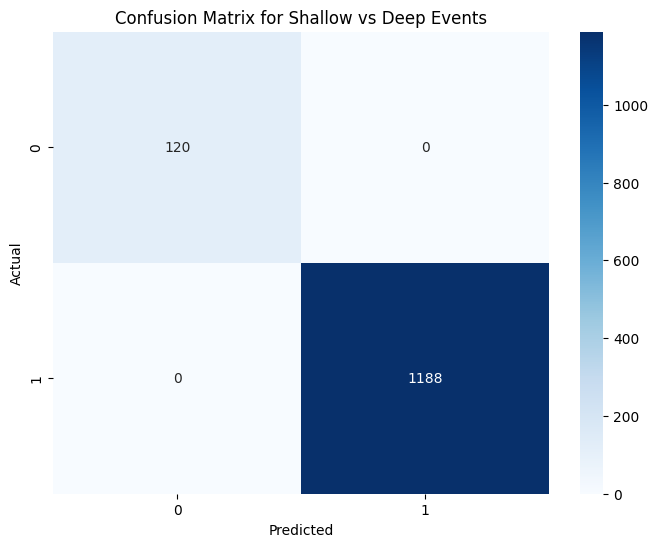

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/AK_DataScience/GVOCatalog_2011_counting.xlsx'
counting_df = pd.read_excel(file_path_1)
# Preview the data
print(counting_df.head())
# Create 'Event_Type' based on 'Depth' column
# Shallow events: Depth < 10 km, Deep events: Depth >= 10 km
counting_df['Event_Type'] = (counting_df['Depth'] < 10).astype(int)
# Define features and target
X_event_class = counting_df[['Depth', 'Shallow LP', 'Deep LP', 'HF', 'Beta Shallow LP', 'Beta Deep LP', 'Beta Total LP']]
y_event_class = counting_df['Event_Type']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_event_class, y_event_class, test_size=0.2, random_state=42)
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(X_test)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix for Shallow vs Deep Events')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Advanced Analysis Ideas

Idea 1: Seismic Event Type Classification

Develop a classification model using:

Independent Variables: Time features (day, month), seismic amplitudes.

Dependent Variable: Event type (Shallow LP, Deep LP, HF).Tools: Random Forest Classifier or Gradient Boosting Classifier.

Idea 2: Seismic Activity Forecasting (RSAM)

Create a time series model to forecast future RSAM values.
Model Options: ARIMA or LSTM.
Metrics: RMSE, MAE for accuracy assessment.

Conclusion

This project provides a framework for analyzing seismicity in the Virunga Volcanic Province. The insights gained can improve eruption forecasting and seismic hazard assessment, contributing to the safety and preparedness of communities in the region.